In [1]:
from selective_bayes import *
import numpy as np
import math
import pandas as pd
from sklearn.metrics import normalized_mutual_info_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

## Preprocessing

In [2]:
dataset = pd.read_csv('Invistico_Airline.csv')
dataset.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [3]:
dataset.columns

Index(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [4]:

column_to_move = dataset.pop("satisfaction")
dataset.insert(22, "satisfaction", column_to_move)




In [5]:
dataset.head()


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,3,3,0,3,5,3,2,0,0.0,satisfied
1,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,3,4,4,4,2,3,2,310,305.0,satisfied
2,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,3,3,4,4,4,2,0,0.0,satisfied
3,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,1,1,0,1,4,1,3,0,0.0,satisfied
4,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,2,2,0,2,4,2,5,0,0.0,satisfied


In [6]:
columns_to_bin =  ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
#dataset, _ = preprocess_dataset(dataset, 'satisfaction', columns_to_bin=columns_to_bin, columns_to_encode=['satisfaction'], duplicates_drop_cols=['Departure Delay in Minutes', 'Arrival Delay in Minutes'])

In [7]:
train, test = train_test_split(dataset, test_size=0.1, random_state=9)


In [8]:
train, _ = preprocess_dataset(train, 'satisfaction', columns_to_bin=columns_to_bin, columns_to_encode=['satisfaction'], duplicates_drop_cols=['Departure Delay in Minutes', 'Arrival Delay in Minutes'])
test, _ = preprocess_dataset(test, 'satisfaction', columns_to_bin=columns_to_bin, columns_to_encode=['satisfaction'], duplicates_drop_cols=['Departure Delay in Minutes', 'Arrival Delay in Minutes'])

Age
Flight Distance
Departure Delay in Minutes
Arrival Delay in Minutes
satisfaction
Age
Flight Distance
Departure Delay in Minutes
Arrival Delay in Minutes
satisfaction


In [9]:
# dataset['Arrival Delay in Minutes'] = dataset['Arrival Delay in Minutes'].fillna(0.)
# dataset['Arrival Delay in Minutes'].unique()
train['Arrival Delay in Minutes'] = train['Arrival Delay in Minutes'].fillna(0.)
train['Arrival Delay in Minutes'].unique()

array([0., 1., 2.])

### NB without smoothing (m=0)

In [14]:
nb = NB_classifier(train, 'satisfaction', m=0)
nb_preds = []
gold_preds = []
nb_probs = []


c:\Users\ultramarine\Desktop\studia_semestr_2\uczenie_maszynowe\projekt\selective_bayes.py:53: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = instance[-1]


In [15]:
for ind, example in test.iterrows():
    prediction, prob = nb.classify(example)
    nb_preds.append(prediction)
    nb_probs.append(prob)
    gold_preds.append(example['satisfaction'])
print(f'Accuracy Naive Bayes: {accuracy_score(gold_preds, nb_preds)}')

Accuracy Naive Bayes: 0.8489374807514629


In [16]:
def plot_roc(preds, probs, gold_preds):
    ordered = zip(gold_preds, probs)
    ordered = sorted(ordered, key=lambda x: x[1])
    gold_o = [x[0] for x in ordered]
    probs_o = [x[1] for x in ordered]
    correct = list(zip(gold_preds, preds, probs))
    # changing predicted class probabilities to be reflective of positive class probabilities, for correct AUC calculation
    new_correct = []
    for (x, y, z) in correct:
        if y == 0:
            new_correct.append((x, y, (1-z)))
        else:
            new_correct.append((x, y, z))
    from sklearn.metrics import roc_curve, auc
    import plotly.express as px
    ## y_score holds the probabilities
    y_score = [z for (x, yy, z) in new_correct]
    y = [x for (x, yy, z) in new_correct]
    fpr, tpr, thresholds = roc_curve(y, y_score)
    fig = px.area(
        x=fpr, y=tpr,
        title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
        labels=dict(x='False Positive Rate', y='True Positive Rate'),
        width=700, height=500
    )
    fig.add_shape(
        type='line', line=dict(dash='dash'),
        x0=0, x1=1, y0=0, y1=1
    )

    fig.update_yaxes(scaleanchor="x", scaleratio=1)
    fig.update_xaxes(constrain='domain')
    return fig

In [17]:
import plotly.express as px
from sklearn.metrics import precision_recall_curve, auc
from sklearn.datasets import make_classification
plot_roc(nb_preds, nb_probs, gold_preds)

In [17]:
correct = list(zip(gold_preds, nb_preds, nb_probs))
new_correct = []
for (x, y, z) in correct:
    if y == 0:
        new_correct.append((x, y, (1-z)))
    else:
        new_correct.append((x, y, z))
y_score = [z for (x, yy, z) in new_correct]
y = [x for (x, yy, z) in new_correct]
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y, y_score)

import plotly.express as px
from sklearn.metrics import precision_recall_curve, auc
from sklearn.datasets import make_classification
precision, recall, thresholds = precision_recall_curve(y, y_score)

fig2 = px.area(
    x=recall, y=precision,
    title=f'Precision-Recall Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='Recall', y='Precision'),
    width=700, height=500
)
fig2.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=1, y1=0
)
fig2.update_yaxes(scaleanchor="x", scaleratio=1)
fig2.update_xaxes(constrain='domain')

fig2.show()


### Attributes and number of zero frequency occurences
Attribute no 21 was not chosen in SNB (11, 6, 13, 12, 1, 4, 14)

In [12]:
nb.zero_frequency_stats

{0: 0,
 1: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 0,
 6: 0,
 7: 0,
 8: 0,
 9: 0,
 10: 0,
 11: 0,
 12: 0,
 13: 3,
 14: 3,
 15: 3,
 16: 3,
 17: 3,
 18: 3,
 19: 3,
 20: 3,
 21: 71,
 22: 0}

### NB without smoothing CM

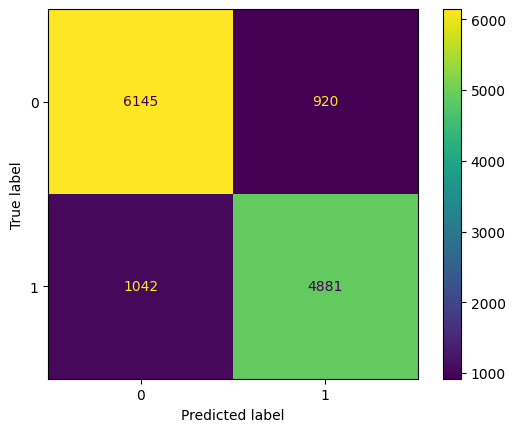

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(gold_preds, nb_preds, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
plt.show()

## NB with smoothing (m=1)

Slight increase in accuracy is observable compared to NB without smoothing

In [10]:
nb = NB_classifier(train, 'satisfaction', m=1)
nb_preds = []
gold_preds = []
nb_probs = []
for ind, example in test.iterrows():
    prediction, prob = nb.classify(example)
    nb_preds.append(prediction)
    nb_probs.append(prob)
    gold_preds.append(example['satisfaction'])
print(f'Accuracy Naive Bayes: {accuracy_score(gold_preds, nb_preds)}')

c:\Users\ultramarine\Desktop\studia_semestr_2\uczenie_maszynowe\projekt\selective_bayes.py:49: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = instance[-1]


Accuracy Naive Bayes: 0.8600246381275023


## 10-fold crossavalidation


In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
kf = KFold(n_splits=10, shuffle=True, random_state=11)
models = []
tests = []
results = []
accuracies = []
precisions = []
recalls = []
f1_scores = []
for i, (t_ind, v_ind) in enumerate(kf.split(dataset)):
    
    train = dataset.iloc[t_ind]     # train set
    valid = dataset.iloc[v_ind]     # validation set
    
    snb, preds, probs, gold = nb_pipeline(train, test, mm=1)
    models.append(snb)
    tests.append(valid)
    results.append((snb, preds, probs, gold))
    accuracies.append(accuracy_score(gold, preds))
    precisions.append(precision_score(gold, preds))
    recalls.append(recall_score(gold, preds))
    f1_scores.append(f1_score(gold, preds)) 
    
print(accuracies)
print(precisions)
print(recalls)
print(f1_scores)

## CM Naive Bayes

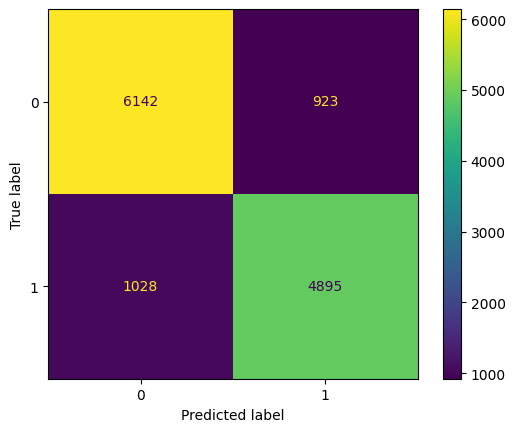

In [45]:
cm = confusion_matrix(gold_preds, nb_preds, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
plt.show()

In [12]:
snb.select_best_model(zero_one_loss=True)

0it [00:00, ?it/s]c:\Users\ultramarine\Desktop\studia_semestr_2\uczenie_maszynowe\projekt\selective_bayes.py:89: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = example[-1]
c:\Users\ultramarine\Desktop\studia_semestr_2\uczenie_maszynowe\projekt\selective_bayes.py:178: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_gold = example[-1] # true label
c:\Users\ultramarine\Desktop\studia_semestr_2\uczenie_maszynowe\projekt\selective_bayes.py:97: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior

Best model attributes (AUC) (11, 6, 13, 12, 1, 4, 14)
Best AUC 0.8732836365872672
{(11,): 0.38379584207006356, (11, 6): 0.3584727561760799, (11, 6, 13): 0.3299840542462907, (11, 6, 13, 12): 0.3365437301902333, (11, 6, 13, 12, 1): 0.3296213788943885, (11, 6, 13, 12, 1, 4): 0.31876557036527814, (11, 6, 13, 12, 1, 4, 14): 0.31190276974200354, (11, 6, 13, 12, 1, 4, 14, 19): 0.3265074519544284, (11, 6, 13, 12, 1, 4, 14, 19, 15): 0.32298517206859045, (11, 6, 13, 12, 1, 4, 14, 19, 15, 16): 0.32677742674586596, (11, 6, 13, 12, 1, 4, 14, 19, 15, 16, 18): 0.33472412139332014, (11, 6, 13, 12, 1, 4, 14, 19, 15, 16, 18, 17): 0.3366590383578592, (11, 6, 13, 12, 1, 4, 14, 19, 15, 16, 18, 17, 0): 0.33065058426286464, (11, 6, 13, 12, 1, 4, 14, 19, 15, 16, 18, 17, 0, 8): 0.32898278320247515, (11, 6, 13, 12, 1, 4, 14, 19, 15, 16, 18, 17, 0, 8, 10): 0.3361324898547366, (11, 6, 13, 12, 1, 4, 14, 19, 15, 16, 18, 17, 0, 8, 10, 5): 0.3324405965386776, (11, 6, 13, 12, 1, 4, 14, 19, 15, 16, 18, 17, 0, 8, 10, 5,

In [13]:
preds = []
gold = []
for ind, example in test.iterrows():
        prediction = snb.classify(example, zero_loss=False)
        preds.append(prediction)
        gold.append(example['satisfaction'])
print(f'Accuracy Selective Naive Bayes with optimal attributes: {accuracy_score(gold, preds)}')

c:\Users\ultramarine\Desktop\studia_semestr_2\uczenie_maszynowe\projekt\selective_bayes.py:291: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  example_prep[i] = example[i]


Predicted class: 0, prob: dict_values([0.9954649632920429, 0.004535036707957184])
Predicted class: 1, prob: dict_values([0.031019410011204656, 0.9689805899887954])
Predicted class: 1, prob: dict_values([0.4388688337137976, 0.5611311662862024])
Predicted class: 0, prob: dict_values([0.9512644551199763, 0.048735544880023705])
Predicted class: 0, prob: dict_values([0.9586547523796725, 0.04134524762032758])
Predicted class: 0, prob: dict_values([0.9999914988775533, 8.501122446677447e-06])
Predicted class: 0, prob: dict_values([0.7593207394866096, 0.24067926051339034])
Predicted class: 0, prob: dict_values([0.9873893877576186, 0.01261061224238131])
Predicted class: 0, prob: dict_values([0.8466188457597699, 0.15338115424023008])
Predicted class: 0, prob: dict_values([0.9994046247300713, 0.0005953752699287468])
Predicted class: 0, prob: dict_values([0.9980033161634274, 0.001996683836572549])
Predicted class: 0, prob: dict_values([0.9479140843392254, 0.05208591566077458])
Predicted class: 0, p

ValueError: Classification metrics can't handle a mix of binary and continuous-multioutput targets

In [16]:
print(f'Accuracy Selective Naive Bayes with optimal attributes: {accuracy_score(gold, preds)}')

Accuracy Selective Naive Bayes with optimal attributes: 0.8714967662457653
